## 학습정리

### 10장. 데이터 다루기
 
#### 10.1 데이터 탐색하기
* 데이터 탐색 : 가장 우선적으로 해야할 일

* 1차원 데이터 탐색하기                                                                                                     
    * 가장 간단한 경우 : 단순히 숫자로만 구성된 1차원 데이터
        1. 요약 통계치(summary statistics)계산
        2. 히스토그램 확인 : 범위를 몇 개의 구간으로 나누고 데이터의 개수를 살펴봄

* 2차원 데이터
    * joint distribution(결합확률 분포 확인)
    * 상관관계를 통한 차이 확인

* 다차원 데이터
    * 각 차원이 어떻게 연관되어 있는지 확인
    * 상관관계 행렬(correlation matrix)
    * 산포도 행렬(scatterplot matrix)
    
#### 10.2 namedtuple 사용하기
* 흔히 데이터를 딕셔너리로 표현
    * 접근할 때 오류를 일으키기 쉬움
    * 타입 어노테이션을 활용하기 힘듬

* named tuple : 튜플과 비슷하지만 명명할 수 있는 공간을 지님
    
#### 10.3 Dataclasses
* Dataclasses 
    * NmaedTuple의 가변적인 버전처럼 동작
        * NamedTuple은 데이터 튜플로 간결하게 표현
    * dataclasses는 몇몇 메서드를 자동으로 생성해주는 일반적인 파이썬 클래스
        * 베이스 클래스(base class)에서 상속받는 대신 데코레이터(decorator)를 사용
        * namedtuple과의 차이 : 인스턴스 값 수정 가능
        * 딕셔너리와 마찬가지로 오류에 취약할 수 있음

#### 10.4 정제하고 합치기
* 문자열을 float,int로 변환
* 누락된 값, 이상치나 잘못된 데이터가 있는지 확인
* 파싱

#### 10.5 데이터 처리
* 리스트 컴프리헨션 활용
    1. 살펴볼 데이터를 특정 행으로 한정
    2. 각 행에서 필요한 값을 갖고옴
    3. 이상치를 찾음
        * 최대,최소값
        * 최대,최소 변화율
        
#### 10.6 척도 조절
* 군집화
    * 서로 가까운 데이터는 같은 군집에 포함 : 데이터 간의 거리를 정의
        * 유클리드 거리 함수 
        * 평균 =0, 표준편차=1로 변환시켜 척도 조절
        * 같은 그룹에 한정된 데이터를 사용한다면 굳이 같은 척도를 사용하지 않아도 됨
        
#### 10.7 한편으로 : tqdm
* tqdm : 진행표시줄을 생성해주는 라이브러리
    * tqdm.trange() : range마다 tqdm
    * with tqdm : 추가 조건
    * 코드에 문제를 일으키는 경우
        * tqdm 반복문으로 또다른 tqdm반복문을 감싸면 에러
    * 주로 느린 계산을 수행할 때 가능하면 사용

#### 10.8 차원 축소
* 데이터의 실제 차원은 주어진 데이터의 차원과 다를 수 있음

* 축이 잘못된 데이터 : 데이터의 편차가 x축이나 y축이 아닌 다른 차원을 따라 발생
    * 주성분 분석(principlal component analysis)
        * 편차를 최대한 포착하는 자원을 찾아냄
            * 평균을 제거한 데이터에 경사하강법을 사용 : 제1 주성분을 잡아내는 방향 구함
                1. 평균이 0이 되도록 정렬 : 어떤 방향이 데이터의 편차를 가장 많이 잡아내는지 확인 가능
                2. 크기가 1인 벡터로 나타내면 각 벡터의 방향을 확인 가능
                    * 0이 아닌 벡터 w가 주어진다면 w가 나타내는 방향으로 데이터의 편차 계산
                    * 편차를 최대화 시키는 방향 : 경사하강법 이용
                3. 주성분에 해당하는 방향을 데이터 주성분에 투영시켜서 해당 성분 값을 찾음 
            * 다른 성분들을 찾기 전에 먼저 투영된 데이터 제거 후 동일한 과정을 통해 다음 주성분 찾음
        * 계산된 성분을 사용하면 주어진 데이터를 저차원 공간에서 생성시킬 수 있다

* 차원 축소가 중요한 이유
    1. 데이터 정제 : 잡음에 해당되는 차원을 제거해 주고 밀접하게 연관된 차원을 합쳐 줌
    2. 다양한 기법 사용 가능 : 저차원으로 축소시킨 데이터에서는 고차원 데이터에서 사용할 수 없는 기법을 사용 가능

* 주의 
    * 차원 축소를 통해 더 좋은 성능의 모형을 만들 수 있지만, 만들어진 모양을 해석하는 것이 어려워짐
                
#### 10.9 더 공부해 보고 싶다면
* pandas : 파이썬으로 전처리를 더 효과적으로 가능
    * 책 추천 : <<파이썬 라이브러리를 활용한 데이터 분석(Python for Data Analysis)>>
* scikit-learn : PCA, 행렬 분해 함수 제공

## code

In [28]:
from typing import List, Dict
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import norm
import math
import random
from collections import Counter

In [41]:
def bucketize(point : float, bucket_size : float) -> float :
    """각 데이터를 bucket_size의 배수에 해당하는 구간에 위치시킴"""
    return bucket_size * math.floor(point / bucket_size) # math.floor() : 주어진 숫자와 같거나 작은 정수 중 가장 큰 수(내림)

def make_histogram(points : List[float], bucket_size : float) -> Dict[float, int] :
    """구간을 생성하고 각 구간 안의 데이터 개수를 계산"""
    return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points : List[float], bucket_size : float, title: str ="") :
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width = bucket_size)
    plt.title(title)
    

In [46]:
# scipy 누적분포함수(cdf)의 역함수 : ppf
scipy.stats.norm.ppf(a)

0.02826529857233656

In [57]:
# seed : 난수를 생성할때 시작 숫자(seed)를 정해주면 컴퓨터가 정해진 알고리즘에 의해 난수처럼 보이는 수열을 생성
random.seed(0)

# -100과 100사이의 균등분포(random.random() : 0~1까지 -> -100~100까지)
uniform = [200*random.random()-100 for _ in range(10000)]

# 평균이 0이고 표준편차가 57인 정규분포
# normal = [57*scipy.stats.norm.ppf(random.random()) for _ in range(10000)] # ppf : cdf의 역함수 
normal = [57*np.random.normal() for _ in range(10000)] # ppf : cdf의 역함수 


In [58]:
uniform

[68.88437030500961,
 51.590880588060486,
 -15.885683833830996,
 -48.21664994140733,
 2.254944273721705,
 -19.01317250991714,
 56.75971780695451,
 -39.33745478421451,
 -4.680609169528836,
 16.676407891006235,
 81.62257703906704,
 0.9373711634780477,
 -43.63243112005924,
 51.16084083144477,
 23.67379933506632,
 -49.898731727511894,
 81.94925119364802,
 96.55709520753061,
 62.04344719931791,
 80.43319008791653,
 -37.970486136133474,
 45.96634965202574,
 79.7676575935987,
 36.79678638308826,
 -5.571456909457325,
 -79.85975838632683,
 -13.165632909243257,
 22.177394688760316,
 82.60221064757965,
 93.32127355415176,
 -4.5980446894566,
 73.061985554328,
 -47.90153792160812,
 61.005565402604475,
 9.739860767117861,
 -97.19165996719622,
 43.94093728079082,
 -20.235291555146247,
 64.96899542964661,
 33.63064024637018,
 -99.77143613711435,
 -1.284426706935065,
 73.52055509855617,
 -51.2178246225736,
 -34.95912745052199,
 74.09424642173093,
 -61.78658169952189,
 13.50214812413438,
 -52.27681427695

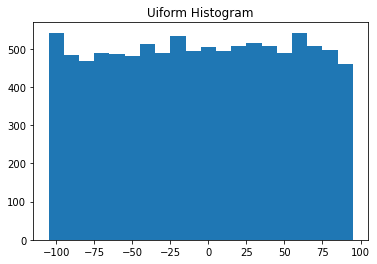

In [59]:
# 균등 분포의 모양
plot_histogram(uniform, 10, "Uiform Histogram")

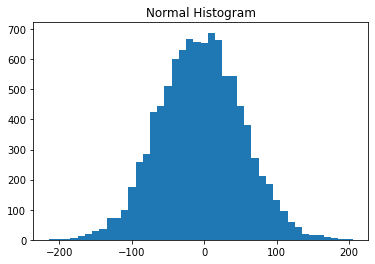

In [60]:
# 정규분포의 모양
plot_histogram(normal, 10, "Normal Histogram")

In [56]:
# 2차원 데이터
# 
def random_normal() -> float :
    """표준정규분포를 따르는 임의의 데이터를 반환"""
    return scipy.stats.norm.ppf(random.random()) #np.random.normal

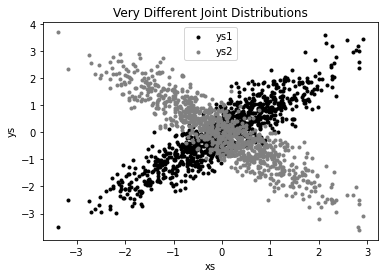

In [61]:
# joint distribution : 결합확률 분포의 산포도
xs = [random_normal() for _ in range(1000)]
ys1 = [x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray', label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

In [64]:
# 상관관계 확인 np.correlate로 계산 
print(np.correlate(xs,ys1))
print(np.correlate(xs,ys2))

[1013.17438166]
[-1017.61128468]


In [67]:
# namedtuple
import datetime
from collections import namedtuple

StockPrice = namedtuple('StockPrice', ['symbol','date','closing_price'])
price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)

assert price.symbol == 'MSFT'
assert price.closing_price == 106.03


In [69]:
# 타입 어노테이션 : NamedTuple

from typing import NamedTuple

class StockPrice(NamedTuple) : # 타입어노테이션
    symbol : str
    date : datetime.date
    closing_price : float
    
    def is_high_tech(self) -> bool :
        """클래스이기 때문에 메서드를 추가할 수 있다"""
        return self.symbol in ['MSFT', "GOOG", "FB", "AMZN", "AAPL"]
    
price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)

assert price.symbol == 'MSFT'
assert price.closing_price == 106.03
assert price.is_high_tech()


In [72]:
price

StockPrice(symbol='MSFT', date=datetime.date(2018, 12, 14), closing_price=106.03)

In [76]:
# dataclasses
from dataclasses import dataclass

@dataclass
class StockPrice2 :
    symbol : str
    date : datetime.date
    closing_price : float
    
    def is_high_tech(self) -> bool :
        """클래스이므로 메서드를 추가할 수 있다"""
        return self.symbol in ['MSFT', 'GOOG','FB', 'AMZN', 'AAPL']
    
price2 = StockPrice2('MSFT', datetime.date(2018, 12, 14), 106.03)

assert price2.symbol == 'MSFT'
assert price2.closing_price == 106.03
assert price2.is_high_tech()

# 주식 분할 
price2.closing_price /= 2
assert price2.closing_price == 53.015
# assert price2.closing_price == 51.03


In [78]:
# 파싱 테스트
from dateutil.parser import parse

def parse_row(row: List[str]) -> StockPrice :
    symbol, date, closing_price = row
    return StockPrice(symbol,
                     date = parse(date).date(), # datetime parsing
                     closing_price = float(closing_price)) # type변환

# 함수 테스트 
stock = parse_row(["MSFT", "2018-12-14", "106.03"])

assert stock.symbol == "MSFT"
assert stock.date == datetime.date(2018, 12, 14)
assert stock.closing_price == 106.03


In [79]:
stock

StockPrice(symbol='MSFT', date=datetime.date(2018, 12, 14), closing_price=106.03)

In [81]:
from typing import Optional
import re

def try_parse_row(row : List[str]) -> Optional[StockPrice] :
    symbol, date_, closing_price_ = row
    
    # 주가 심벌은 모두 대문자로 구성
    if not re.match(r"^[A-Z]+$", symbol) :
        return None
    
    try : 
        date = parse(date_).date()
    except ValueError :
        return None
    
    try : 
        closing_price = float(closing_price_)
    except ValueError :
        return None
    
    return StockPrice(symbol, date, closing_price)

# 오류가 나면 None을 반환 
assert try_parse_row(["MSFT0","2018-12-14","106.03"]) is None 
assert try_parse_row(["MSFT","2018-12--14","106.03"]) is None 
assert try_parse_row(["MSFT","2018-12-14","x"]) is None 

# 만약 올바른 데이터라면 동일한 결과 반환
assert try_parse_row(["MSFT", "2018-12-14", "106.03"]) == stock


In [ ]:
# 데이터 불러오기
import csv

data : List[StockPrice] = []

with open("filename.csv") as f :
    reader = csv.reader(f)
    for row in reader :
        maybe_stock = try_parse_row(row)
        if maybe_stock is None :
            print(f"skipping invalid row: {row}")
        else :
            data.append(maybe_stock)

In [83]:
# tqdm (작업 진행상황 확인)
import tqdm

for i in tqdm.tqdm(range(100)) : #tqdma.trange
    # 오래 걸리는 연산을 수행
    _ = [random.random() for _ in range(100000)]



100%|██████████| 100/100 [00:00<00:00, 110.25it/s]


In [84]:
# tqdm.trange, with tqdm(설명 추가)

from typing import List

# 소수를 발견하는 함수 
def primes_up_to(n : int) -> List[int] :
    primes = [2]
    
    with tqdm.trange(3, n) as t :
        for i in t :
            # i가 더 작은 소수로 나뉘지 않는다면 소수다.
            i_is_prime = not any(i % p == 0 for p in primes)
            if i_is_prime :
                primes.append(i)
                
            t.set_description(f"{len(primes)} primes")
        
    return primes

my_primes = primes_up_to(100_000)

429 primes:   3%|▎         | 2892/99997 [00:02<01:15, 1289.08it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

926 primes:   7%|▋         | 7211/99997 [00:04<01:11, 1305.63it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

1380 primes:  11%|█▏        | 11416/99997 [00:07<00:59, 1490.39it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limi

In [90]:
# 차원 축소

# Vector type
Vector = List[float]

def de_mean(data : List[Vector]) -> List[Vector] :
    """모든 차원의 평균이 각각 0이 되도록 재정렬"""
    mean = np.mean(data)  
    return [np.subtract(vector, mean) for vector in data]
